# LANDIS II model output exploration

#### Working with the Camp Navajo study model output 

### Required libraries, Variable and path definition

In [32]:
# Specify inline plots for notebook
%matplotlib inline

# Libraries -- overkill for the time being
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime
import gdal


inputDir = '/home/nikko/Research/LANDIS/Camp_Navajo/Output/'
outputDir = '/home/nikko/Research/LANDIS/Camp_Navajo/Output/Plots'

### Function definition

In [84]:
# Generator function to whip up the directory structure for the model outputs.
# I'm going to use the existing structure handed to me for the Camp Navajo (CN)
# study, and run with it. Here,we're creating a directory and file generator function
def dirs(path):
    for dir in os.listdir(path):
        if os.path.isdir(os.path.join(path, dir)):
            yield dir

def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file



### Directory and file listing by experiment design

In [372]:
# Start by determining the simulation names used in the experiment
simNames = []
simNames_f = []
gen = dirs(inputDir)
for names in gen:
    simNames.append(names)
    simNames_f.append(inputDir + '/' + names)

    
# Tab into one of the simulations and start exploring the structure
# We need to grab the iterations (runs), and file names within each iteration
iterations = []
iterations_f = []
gen = dirs(simNames_f[0] + '/')
for names in gen:
    iterations.append(names)
    iterations_f.append(simNames_f[0] + '/' + names)

# Ultimately gotta clean this up for an experiment specific generator that produces
# file paths to all model output per simulation, iterated by run
fileNames = []
fileNames_f = []
gen = files(iterations_f[0])
for names in gen:
    fileNames.append(names)
    fileNames_f.append(iterations_f[0] + '/' + names)


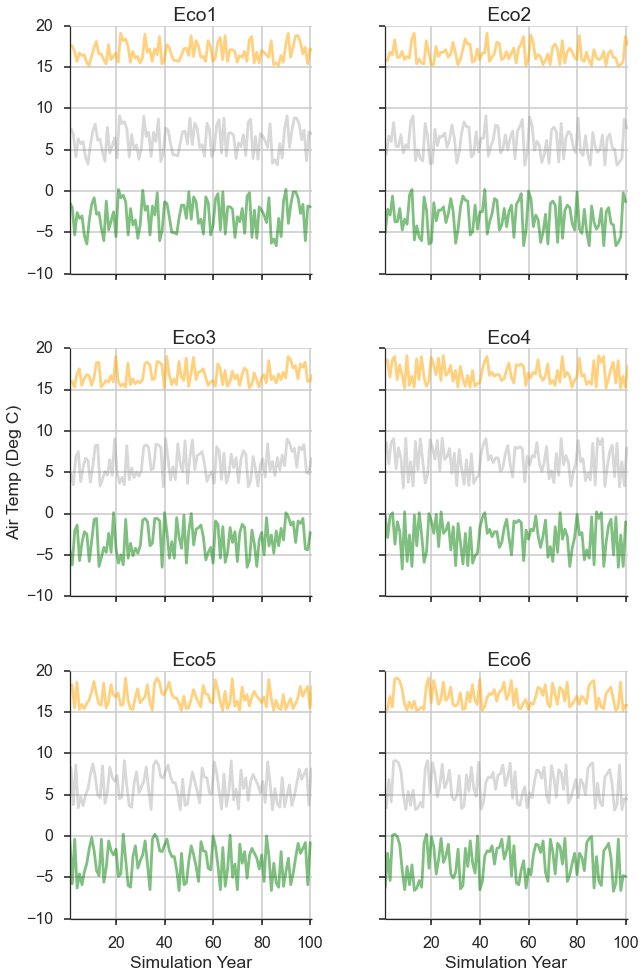

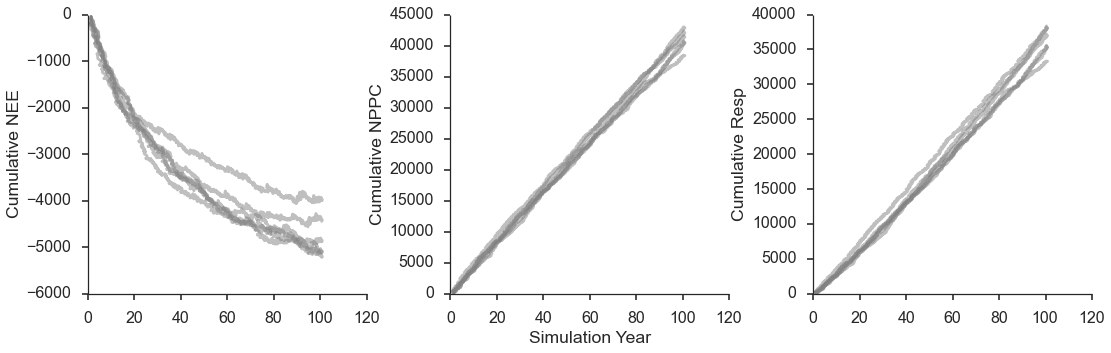

In [271]:
# Start making some plots of the Century file vars, by ecoregion
Century_Monthly = pd.read_csv(fileNames_f[0], sep = ',')
Century_Monthly['TS'] = Century_Monthly.Time + (Century_Monthly[' Month'] - 1)/12


# Air T by Ecoregion
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (10, 16), dpi = 300,
                                                      sharex = True, sharey = True)
plt.subplots_adjust(wspace = .3, hspace = 0.3)
axs = f.axes
idx = 0
sns.despine()
sns.set_style("ticks")
sns.set_context("poster")

for region in np.unique(Century_Monthly[' Ecoregion']):
    ax = axs[idx]
    ax.grid(False)

    thisRegion = Century_Monthly[Century_Monthly[' Ecoregion'] == region]
    thisRegion.groupby('Time').mean().plot(ax = ax, 
        x = 'TS',y = ' T', kind = 'line', alpha = 0.3, c = 'gray')
    thisRegion.groupby('Time').max().plot(ax = ax, 
        x = 'TS',y = ' T', kind = 'line', alpha = 0.5, c = 'orange')
    thisRegion.groupby('Time').min().plot(ax = ax, 
        x = 'TS',y = ' T', kind = 'line', alpha = 0.5, c = 'green')
    ax.set_title(region)
    ax.set_xlabel('Simulation Year')
    if idx == 2:
        ax.set_ylabel('Air Temp (Deg C)')
    ax.legend_ = None

    idx = idx + 1

# Cumulative flux components by Ecoregion
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5), dpi = 300)

plt.subplots_adjust(wspace = .3, hspace = 0.5)
axs = f.axes
idx = 0
sns.despine()
sns.set_style("ticks")
sns.set_context("poster")

for var in [' NEE',' NPPC',' Resp']:
    for region in np.unique(Century_Monthly[' Ecoregion']):
        ax = axs[idx]
        ax.grid(False)

        thisRegion = Century_Monthly[Century_Monthly[' Ecoregion'] == region]
        ax.plot(thisRegion.TS, thisRegion[var].cumsum(), color = 'grey',
               alpha = 0.5)
        if idx == 1:
            ax.set_xlabel('Simulation Year')
        ax.set_ylabel('Cumulative' +  var)
        ax.legend_ = None

    idx = idx + 1

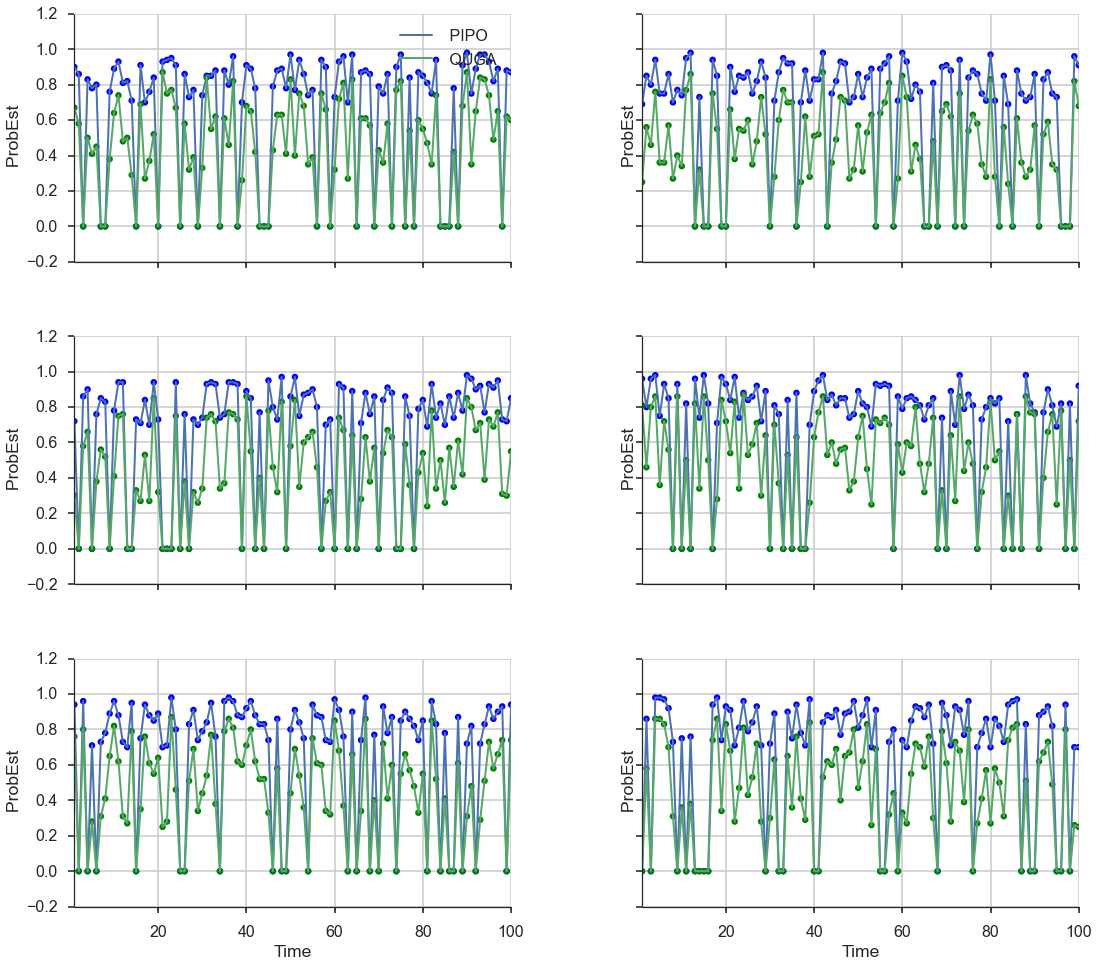

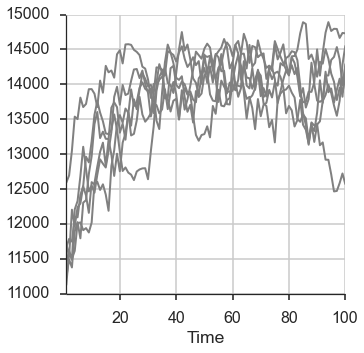

In [338]:
Century_Prob = pd.read_csv(fileNames_f[1], sep = ',')

# Esablishment Probability by Ecoregion
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (18, 16), dpi = 300,
                                                      sharex = True, sharey = True)
plt.subplots_adjust(wspace = .3, hspace = 0.3)
axs = f.axes
idx = 0
sns.despine()
sns.set_style("ticks")
sns.set_context("poster")

for region in np.unique(Century_Monthly[' Ecoregion']):
    ax = axs[idx]
    ax.grid(False)
    thisRegion = Century_Monthly[Century_Monthly[' Ecoregion'] == region]
    for species in np.unique(Century_Prob[' Species']):
        if species == ' PIPO':
            speciesC = 'blue'
        else:
            speciesC = 'green'
        thisSpecies = thisRegion[thisRegion[' Species'] == species]
        thisSpecies.plot(ax = ax, x = 'Time',y = ' ProbEst', lw = 2)
        thisSpecies.plot(kind = 'scatter', ax = ax, x = 'Time',y = ' ProbEst', lw = 2, 
                         color = speciesC)

    if idx == 0:
        ax.legend(np.unique(Century_Prob[' Species']))
    else:
        ax.legend_ = None

    idx = idx + 1
    
# Succesion_log AGB by Ecoregion
Century_log = pd.read_csv(fileNames_f[2], sep = ',')

f, (ax1) = plt.subplots(1,1, figsize = (5, 5), dpi = 300)
plt.subplots_adjust(wspace = .3, hspace = 0.3)
axs = f.axes
idx = 0
sns.despine()
sns.set_style("ticks")
sns.set_context("poster")
ax = ax1
for region in np.unique(Century_log[' Ecoregion']):
    ax.grid(False)
    thisRegion = Century_log[Century_log[' Ecoregion'] == region]
    thisRegion.plot(ax = ax, x = 'Time',y = ' AGB', lw = 2, color = 'gray')
    ax.legend_ = None



### Example drilling through stacks of rasters to generate ensembles

/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 3
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 1
1
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 4
2
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 2
3
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 5
4


<matplotlib.colorbar.Colorbar instance at 0x7f2726fac7e8>

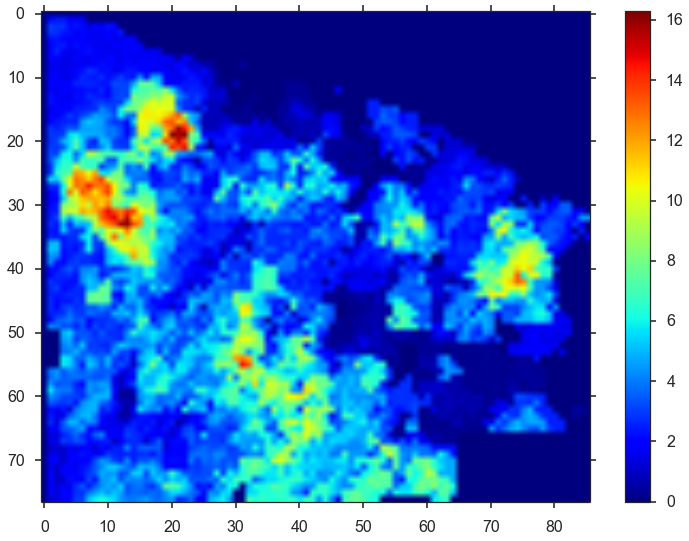

In [609]:
meanBM = np.zeros((77,86), dtype=np.float)
meanBMz = np.zeros((77,86), dtype=np.float)
idx = 0
for iteration in iterations_f:
    print iteration
    totalBM = np.zeros((77,86), dtype=np.float)
    totalBMz = np.zeros((77,86), dtype=np.float)

    count = 0
    MapNames_f = []
    gen = dirs(iteration)
    for names in gen:
        MapNames_f.append(iteration + '/' + names)
    sevm = []
    gen = dirs(MapNames_f[9])
    for names in gen:
        sevm.append(MapNames_f[9] + '/' + names)
    sevmaps = []
    gen = files(sevm[0])
    for names in gen:
        sevmaps.append(sevm[0] + '/' + names)
    
    for sevmap in sevmaps:
        ds = gdal.Open(sevmap)
        band = ds.GetRasterBand(1)
        #band.SetNoDataValue(0)
        biomass = band.ReadAsArray()
        biomass = biomass.astype(float)
        biomass[biomass == 1] = 0

        totalBM = totalBM + biomass
        totalBMz = np.dstack((totalBMz, biomass))
    if idx == 0:
        meanBMz = totalBMz
    else:
        meanBMz = (meanBMz + totalBMz) / 2
        print idx
        count = count + 1
    idx = idx + 1
        
plt.imshow(meanBMz.sum(axis=2), cmap = 'jet')
plt.colorbar()


/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 3
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 1
1
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 4
2
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 2
3
/home/nikko/Research/LANDIS/Camp_Navajo/Output/Thin Burn Wildfire/Run 5
4


<matplotlib.colorbar.Colorbar instance at 0x7f2724f4c3f8>

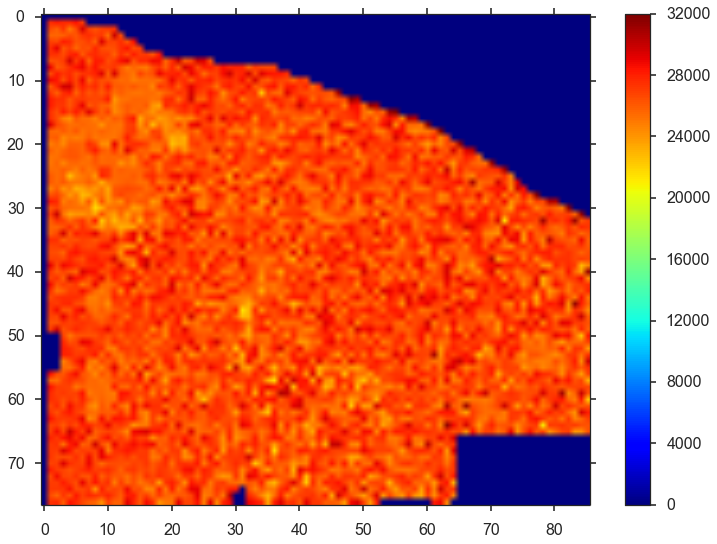

In [612]:
meanBM = np.zeros((77,86), dtype=np.float)
meanBMz = np.zeros((77,86), dtype=np.float)
idx = 0
for iteration in iterations_f:
    print iteration
    totalBM = np.zeros((77,86), dtype=np.float)
    totalBMz = np.zeros((77,86), dtype=np.float)

    count = 0
    MapNames_f = []
    gen = dirs(iteration)
    for names in gen:
        MapNames_f.append(iteration + '/' + names)
    sevmaps = []
    gen = files(MapNames_f[4])
    for names in gen:
        sevmaps.append(MapNames_f[4] + '/' + names)
    
    for sevmap in sevmaps:
        ds = gdal.Open(sevmap)
        band = ds.GetRasterBand(1)
        #band.SetNoDataValue(0)
        biomass = band.ReadAsArray()
        biomass = biomass.astype(float)
        biomass[biomass == 1] = 0

        totalBM = totalBM + biomass
        totalBMz = np.dstack((totalBMz, biomass))
    if idx == 0:
        meanBMz = totalBMz
    else:
        meanBMz = (meanBMz + totalBMz) / 2
        print idx
        count = count + 1
    idx = idx + 1
        
plt.imshow(meanBMz.sum(axis=2), cmap = 'jet')
plt.colorbar()




<matplotlib.colorbar.Colorbar instance at 0x7f27247e8950>

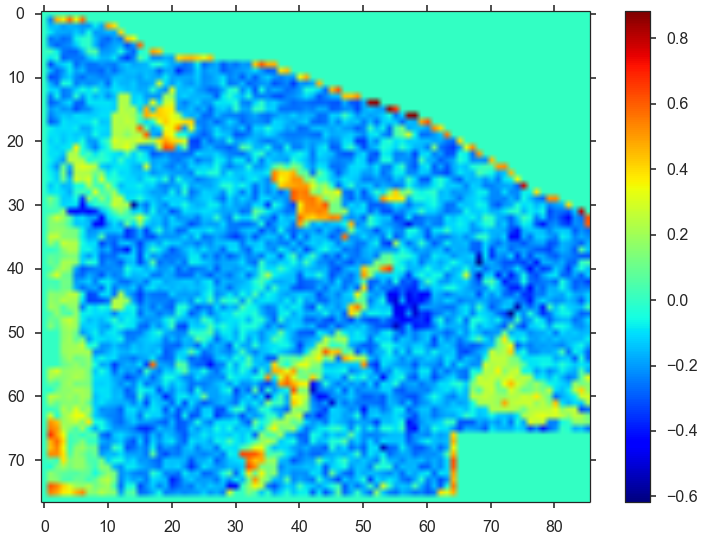

In [621]:
# Example linear fit over 5 replicates of 100 years of simulation
# negative values indicate decreased NPP, positive values indicate increased NPP
emptyFit = np.zeros((77,86), dtype=np.float)
for row in np.arange(0,76):
    for column in np.arange(0,86):
        x = np.arange(0,101)
        y = meanBMz[row][column][:]
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        emptyFit[row][column] = z[0]
        
plt.imshow(emptyFit, cmap = 'jet')
plt.colorbar()

array([ 0.,  0.])